# 02. PyTorch Neural Network Classification

## What is a classification problem?

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy). |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>
    
Classification, along with regression (predicting a number, covered in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)) is one of the most common types of machine learning problems.

In this notebook, we're going to work through a couple of different classification problems with PyTorch. 

In other words, taking a set of inputs and predicting what class those set of inputs belong to.

## What we're going to cover

In this notebook we're going to reiterate over the PyTorch workflow we covered in [01. PyTorch Workflow](https://www.learnpytorch.io/02_pytorch_classification/).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="a pytorch workflow flowchart" width=900/>

Except instead of trying to predict a straight line (predicting a number, also called a regression problem), we'll be working on a **classification problem**.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Architecture of a classification neural network** | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| **1. Getting binary classification data ready** | Data can be almost anything but to get started we're going to create a simple binary classification dataset. |
| **2. Building a PyTorch classification model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. | 
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model (from a model perspective)** | We've trained and evaluated a model but it's not working, let's try a few things to improve it. |
| **6. Non-linearity** | So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines? |
| **7. Replicating non-linear functions** | We used **non-linear functions** to help model non-linear data, but what do these look like? |
| **8. Putting it all together with multi-class classification** | Let's put everything we've done so far for binary classification together with a multi-class classification problem. |


## 0. Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to get hands-on with this setup throughout this notebook.

## 1. Make classification data and get it ready
Let's begin by making some data.

We'll use the `make_circles()` method from Scikit-Learn to generate two circles with different coloured dots.

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn

This line imports the `scikit-learn` library, which is a popular machine learning library in Python. It provides tools for creating datasets, building models, and evaluating them.

---

### 2. Generating Synthetic Data with `make_circles`


In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

- **`make_circles`**: This function generates a synthetic dataset of points arranged in two concentric circles. It is commonly used for binary classification problems.
- **`n_samples=1000`**: Specifies the total number of data points (samples) to generate.
- **`noise=0.03`**: Adds a small amount of random noise to the data points to make the dataset more realistic and challenging.
- **`random_state=42`**: Ensures reproducibility by setting a fixed seed for random number generation.

The function returns:
- `X`: A 2D array of shape `(n_samples, 2)` containing the coordinates of the data points.
- `y`: A 1D array of shape `(n_samples,)` containing the labels (0 or 1) for each data point.

---

### 3. Checking the Length of the Data


In [4]:
len(X), len(y)

(1000, 1000)

This line checks the number of samples in `X` (features) and `y` (labels). Since we specified `n_samples=1000`, both `X` and `y` should have 1000 elements.

---

### 4. Inspecting the First Few Data Points


In [5]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


- **`X[:5]`**: Displays the first 5 rows of the feature array `X`. Each row contains two values representing the x and y coordinates of a data point.
- **`y[:5]`**: Displays the first 5 labels in the array `y`. Each label is either `0` or `1`, indicating which circle the corresponding data point belongs to.

The output helps us understand the structure of the dataset:
- `X` contains the coordinates of the points.
- `y` contains the labels (0 or 1) for binary classification.

---

In [6]:
# make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


It looks like each pair of `X` features (`X1` and `X2`) has a label (`y`) value of either 0 or 1.

This tells us that our problem is binary classification since there's only two options (0 or 1).

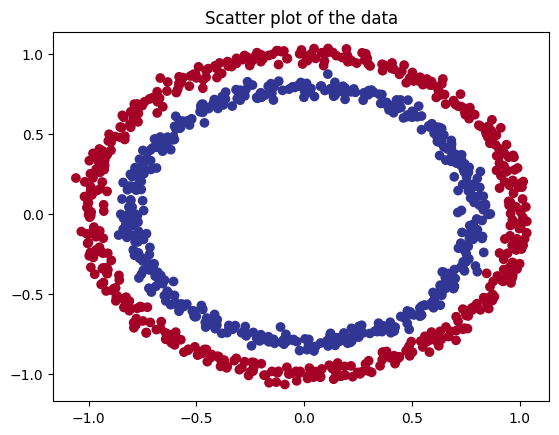

In [7]:
import matplotlib.pyplot as plt
# Plot the data
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Scatter plot of the data")
plt.show()

Alrighty, looks like we've got a problem to solve.

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).

**Note:** This dataset is often what's considered a toy problem (a problem that's used to try and test things out on) in machine learning.

But it represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into red or blue dots.

### 1.1 Input and output shapes
One of the most common errors in deep learning is shape errors.

Mismatching the shapes of tensors and tensor operations will result in errors in your models.

We're going to see plenty of these throughout the course.

And there's no surefire way to make sure they won't happen, they will.

What you can do instead is continually familiarize yourself with the shape of the data you're working with.

I like referring to it as input and output shapes.

Ask yourself:

"What shapes are my inputs and what shapes are my outputs?"

Let's find out.

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [10]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Looks like we've got a match on the first dimension of each.

There's 1000 `X` and 1000 `y`.

But what's the second dimension on `X`?

It often helps to view the values and shapes of a single sample (features and labels).

Doing so will help you understand what input and output shapes you'd be expecting from your model.

In [11]:
# view the first example if features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In the context of linear algebra and machine learning, the reason `y` has no shape (or appears as a 1D array) is because it represents **scalar values** (labels) rather than vectors or matrices. Let me explain this step by step:

---

##### 1. **What is `y`?**
`y` is the **label array** for the dataset. It contains the target values for each data point in `X`. In this case, `y` is a 1D array of binary values (0 or 1), where each value corresponds to the class of a data point in `X`.

For example:
- If `X[i]` is the feature vector for the `i-th` data point, then `y[i]` is the label (either 0 or 1) for that data point.

---

##### 2. **Shape of `y`**
In linear algebra:
- A **vector** is a 1D array of numbers, which can be thought of as a column or row in a matrix.
- A **scalar** is a single number.

`y` is a **1D array** (or vector) of length `n_samples` (1000 in this case). It does not have a second dimension because each label is a scalar value, not a vector.

For example:
- `y = [0, 1, 0, 1, 0]` is a 1D array (vector) of shape `(5,)`.
- It does not have a second dimension because each label is a single number, not a multi-dimensional object.

---

##### 3. **Why does `y` have no shape like `X`?**
`X` is a **2D array** (or matrix) because it contains feature vectors for each data point. Each row in `X` is a vector of features (e.g., `[x1, x2]` for 2D data). Therefore, `X` has a shape of `(n_samples, n_features)`.

In contrast:
- `y` is a **1D array** because it only contains one scalar value (the label) for each data point. It does not need a second dimension.

Mathematically:
- `X` is a matrix of size `n_samples × n_features`.
- `y` is a vector of size `n_samples`.

##### 4. **Why is this important?**
The distinction between `X` and `y` is crucial for machine learning:
- `X` is the **input** to the model, containing multiple features for each data point.
- `y` is the **output** (or target), containing a single label for each data point.

When training a model, the algorithm uses the rows of `X` (feature vectors) to predict the corresponding values in `y` (labels).


### 1.2 Turn data into tensors and create train and test splits
We've investigated the input and output shapes of our data, now let's prepare it for being used with PyTorch and for modelling.

Specifically, we'll need to:

- Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).
- Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).




##### **Why Do We Need to Convert Data into Tensors?**

In deep learning workflows, converting data into PyTorch tensors is essential for the following reasons:
- **NumPy arrays** are great for general-purpose numerical computations but lack GPU support and autograd capabilities.
- **PyTorch tensors** are specifically designed for deep learning, offering GPU acceleration, autograd, and seamless integration with PyTorch models.
- Converting data into tensors is necessary to leverage PyTorch's deep learning capabilities, including training models and performing efficient computations.

In [12]:
import torch

In [13]:
# turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [14]:
# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
X.dtype, y.dtype

(torch.float32, torch.float32)

Now our data is in tensor format, let's split it into training and test sets.

To do so, let's use the helpful function `train_test_split()` from Scikit-Learn.

We'll use `test_size=0.2` (80% training, 20% testing) and because the split happens randomly across the data, let's use `random_state=42` so the split is reproducible.

In [ ]:
import sklearn
# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

we've now got 800 training samples and 200 testing samples.

### 2. Building a model
We've got some data ready, now it's time to build a model.

We'll break it down into a few parts.

- Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
- Constructing a model by subclassing `nn.Module`.
- Defining a loss function and optimizer.
- Creating a training loop (this'll be in the next section).
The good news is we've been through all of the above steps before in notebook 01.

Except now we'll be adjusting them so they work with a classification dataset.

Let's start by importing PyTorch and `torch.nn` as well as setting up device agnostic code.

In [17]:
# import pytorch and nn
import torch
from torch import nn

# set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
X_train, y_train

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]),
 tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
         0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
         1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
         1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
         0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
         0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,


Excellent, now `device` is setup, we can use it for any data or models we create and PyTorch will handle it on the CPU (default) or GPU if it's available.

How about we create a model?

We'll want a model capable of handling our `X` data as inputs and producing something in the shape of our `y` data as outputs.

In other words, given `X` (features) we want our model to predict `y` (label).

This setup where you have features and labels is referred to as supervised learning. Because your data is telling your model what the outputs should be given a certain input.

To create such a model it'll need to handle the input and output shapes of `X` and `y`.

Remember how I said input and output shapes are important? Here we'll see why.

Let's create a model class that:

- Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
- Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.
- Defines a `forward()` method containing the forward pass computation of the model.
- Instantiates the model class and sends it to the target `device`

In [19]:
# construct a model that subclasses nn.Moule
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    # 3. Create a forward method that takes in data and passes it through the layers
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2
# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

### What's Going On Here?

We've seen a few of these steps before. The only major change is what's happening between `self.layer_1` and `self.layer_2`.

- **`self.layer_1`**: Takes 2 input features (`in_features=2`) and produces 5 output features (`out_features=5`).
  - This is known as having **5 hidden units** or **neurons**.
  - This layer transforms the input data from having 2 features to 5 features.

---

### Why Do This?

- Transforming the input data into more features allows the model to learn patterns from **5 numbers** rather than just **2 numbers**, potentially leading to better outputs.
- **Potentially** is key here because sometimes increasing the number of hidden units doesn't improve performance.

---

### Hidden Units as a Hyperparameter

- The number of hidden units (neurons) in a layer is a **hyperparameter**, meaning it’s a value you can set yourself.
- There’s no fixed rule for how many hidden units to use:
  - **More hidden units** can help the model learn more complex patterns.
  - **Too many hidden units** can lead to overfitting or unnecessary computational cost.
- The choice of hidden units depends on:
  - The **type of model**.
  - The **complexity of the dataset**.

Since our dataset is small and simple, we’ll keep the number of hidden units small.

---

### Rule for Hidden Units

- The **output features** (`out_features`) of one layer must match the **input features** (`in_features`) of the next layer.
- In our case:
  - `self.layer_1` outputs 5 features (`out_features=5`).
  - `self.layer_2` takes 5 features as input (`in_features=5`) and reduces them to 1 feature (`out_features=1`), which matches the shape of `y`.

This ensures the data flows correctly through the layers of the model.

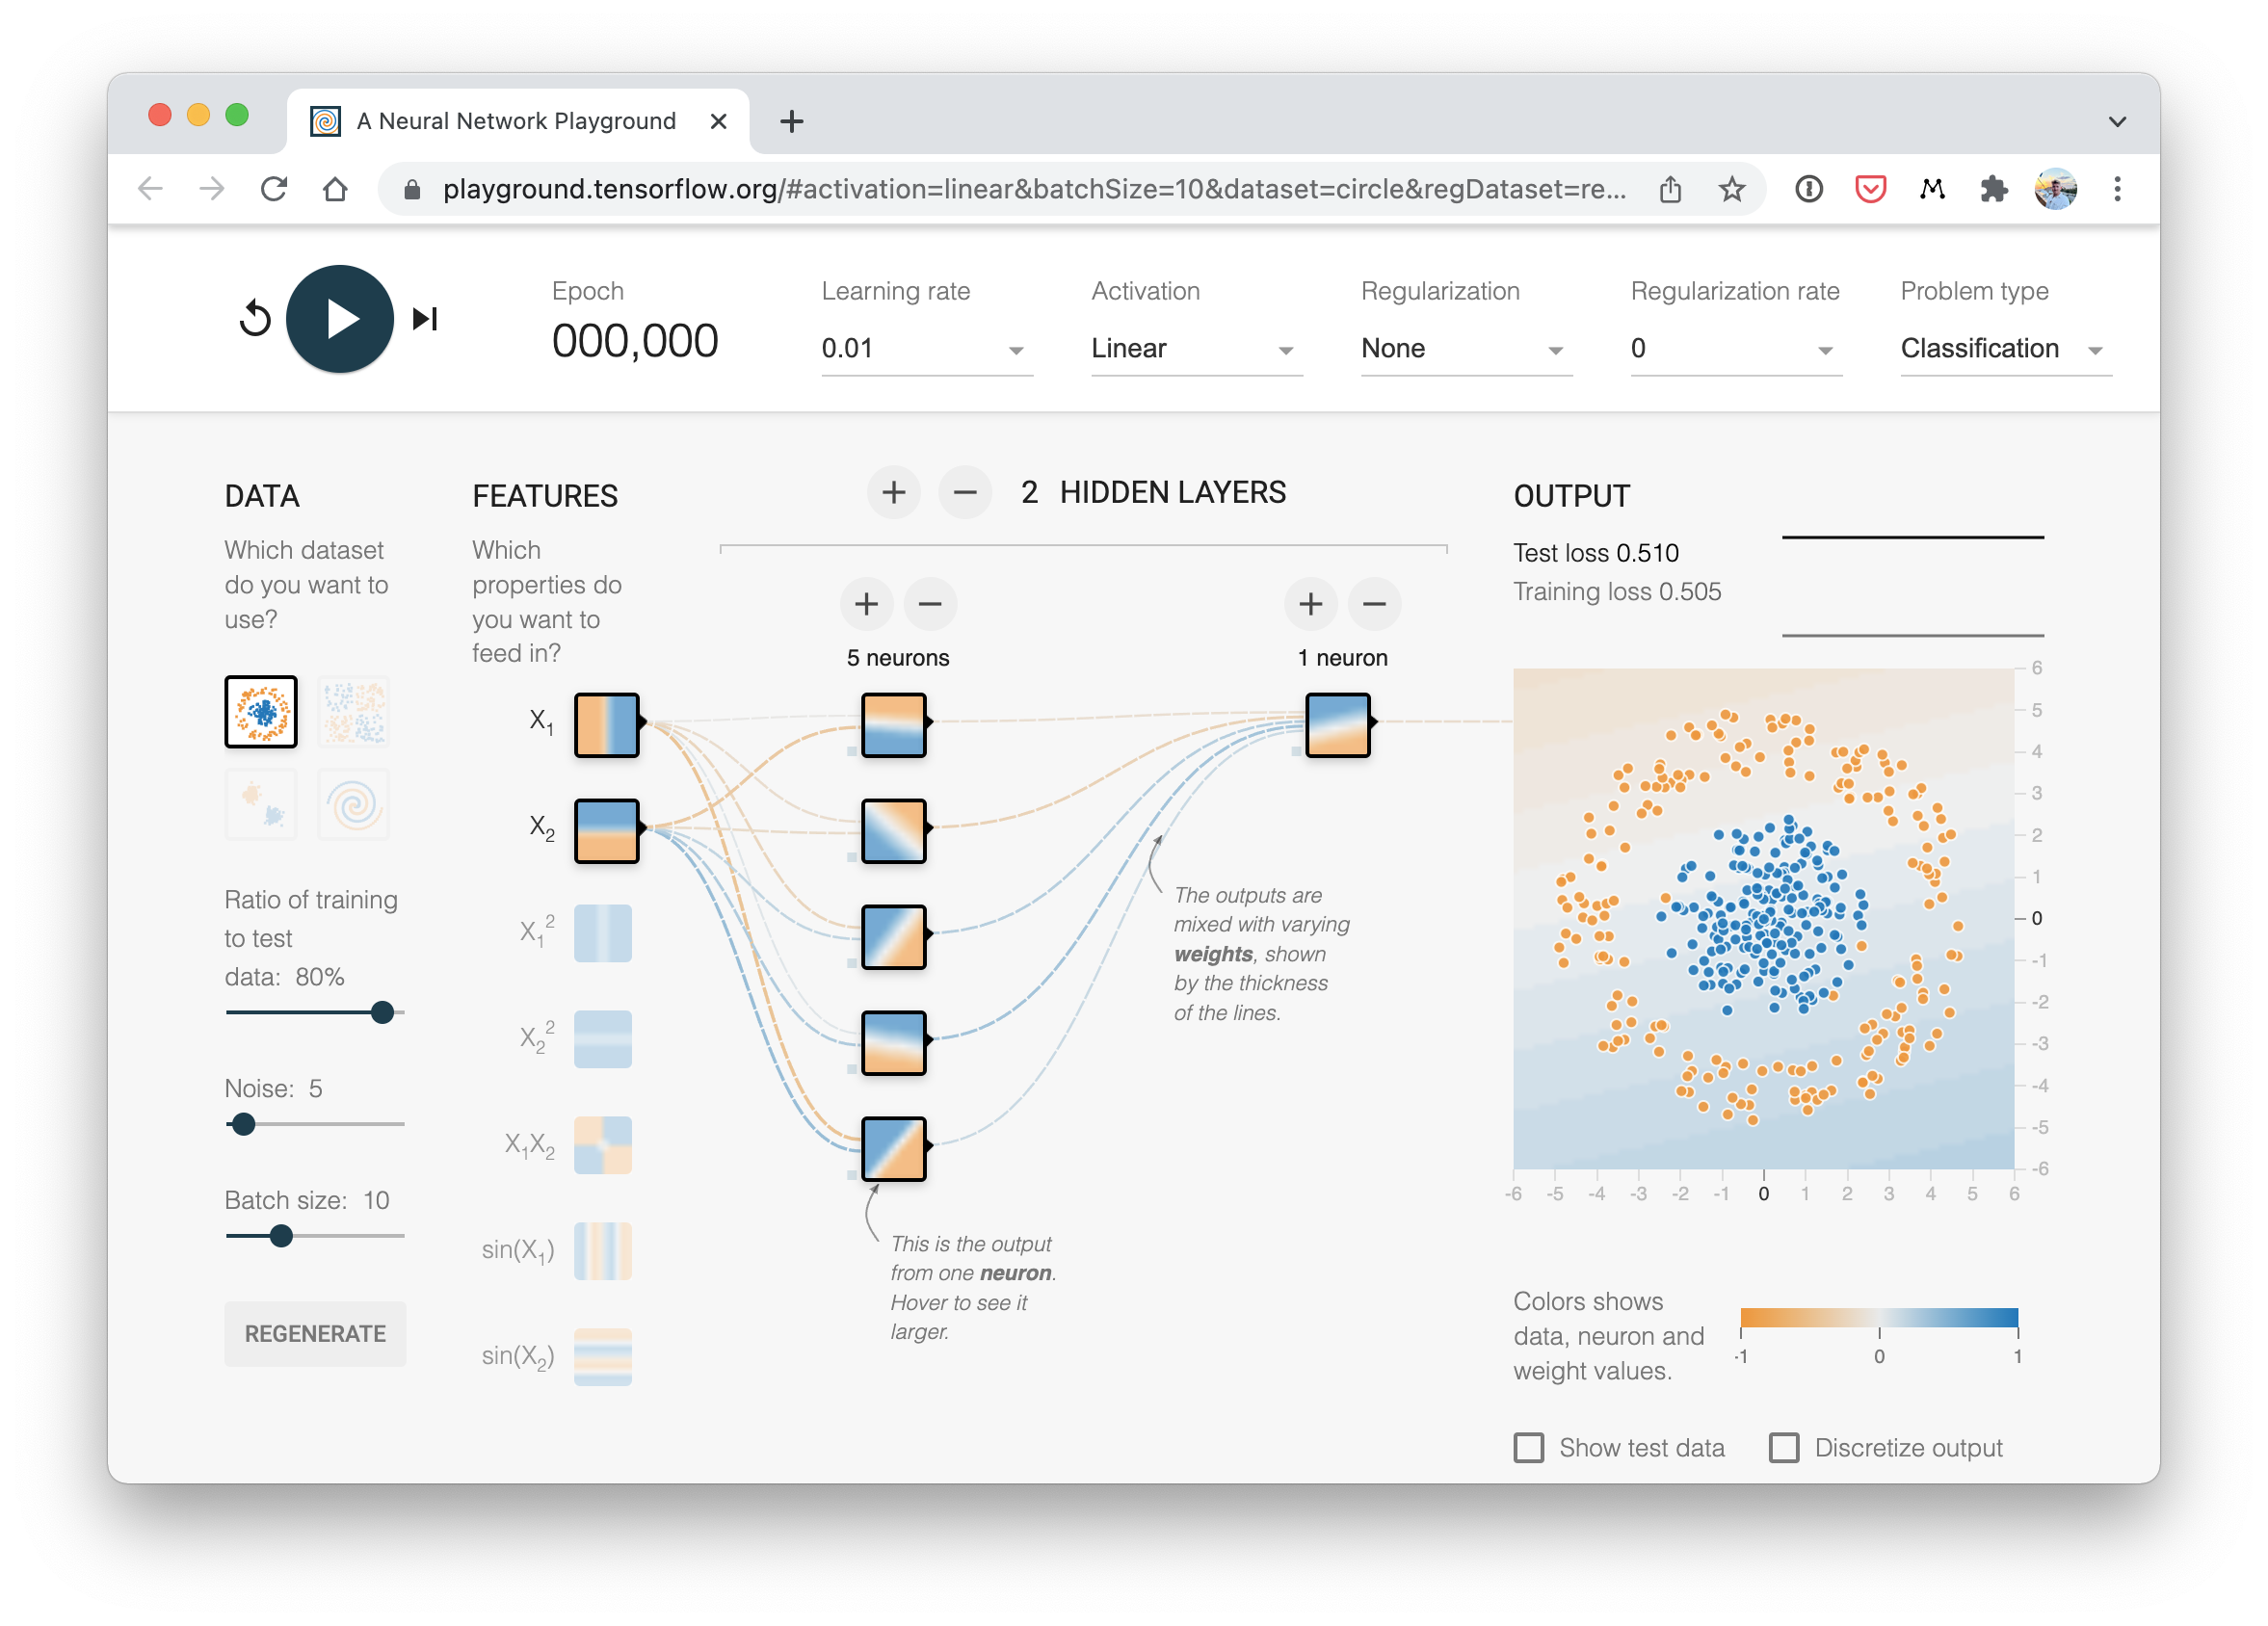

A visual example of what a similar classification neural network to the one we've just built looks like. Try creating one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/).

You can also do the same as above using `nn.Sequential`.

nn.Sequential performs a forward pass computation of the input data through the layers in the order they appear.

Here’s a detailed explanation of the code, step by step:

---

### **1. Subclassing `nn.Module`**


```python
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
```

- **`nn.Module`**: This is the base class for all neural networks in PyTorch. By subclassing `nn.Module`, we can define our own custom neural network.
- **`super().__init__()`**: This initializes the parent class (`nn.Module`) so that all its functionality (like parameter tracking, saving, etc.) is available in our custom model.

---

### **2. Defining the Layers**


```python
self.layer_1 = nn.Linear(in_features=2, out_features=5)
self.layer_2 = nn.Linear(in_features=5, out_features=1)

- **`nn.Linear`**: This is a fully connected (dense) layer in PyTorch. It performs a linear transformation:
  \[
  y = xW^T + b
  \]
  where:
  - \(x\) is the input,
  - \(W\) is the weight matrix,
  - \(b\) is the bias vector.

- **`in_features=2`**: The first layer (`layer_1`) expects input data with 2 features (e.g., the `X` dataset generated by `make_circles` has 2 features: \(x_1\) and \(x_2\)).
- **`out_features=5`**: The first layer outputs 5 features. This means it transforms the 2D input into a 5D representation.
- **`in_features=5`**: The second layer (`layer_2`) takes the 5D output from `layer_1` as input.
- **`out_features=1`**: The second layer outputs a single feature, which corresponds to the prediction for the target variable \(y\) (binary classification: 0 or 1).

---

### **3. Defining the Forward Pass**


```python
def forward(self, x):
    return self.layer_2(self.layer_1(x))

- **`forward`**: This method defines how the input data flows through the model. It is called automatically when you pass data to the model (e.g., `model_0(X)`).
- **`self.layer_1(x)`**: The input `x` (a batch of data points) is passed through the first layer (`layer_1`). This performs the linear transformation and outputs a 5D representation for each data point.
- **`self.layer_2(...)`**: The output of `layer_1` is passed to the second layer (`layer_2`), which reduces the 5D representation to a single value (the predicted label for each data point).
- **Chaining Layers**: The computation flows sequentially through `layer_1` and then `layer_2`.

Mathematically, the forward pass can be represented as:
\[
\text{output} = \text{layer\_2}(\text{layer\_1}(x))
\]
where:
- `layer_1` computes:
  \[
  h = xW_1^T + b_1
  \]
- `layer_2` computes:
  \[
  y = hW_2^T + b_2
  \]

---

### **4. Creating an Instance of the Model**


```python
model_0 = CircleModelV0().to(device)

- **`CircleModelV0()`**: Creates an instance of the `CircleModelV0` class, initializing the layers (`layer_1` and `layer_2`) and their parameters (weights and biases).
- **`.to(device)`**: Moves the model to the specified device (`device` could be a CPU or GPU). This ensures that the model's computations are performed on the same device as the data.

---

### **5. Why This Model Works for Binary Classification**
- The input data `X` has 2 features (e.g., coordinates of points in a 2D space).
- The first layer (`layer_1`) transforms the 2D input into a 5D representation, allowing the model to learn more complex patterns.
- The second layer (`layer_2`) reduces the 5D representation to a single value, which can be interpreted as the predicted label for binary classification (e.g., 0 or 1).

---

### **6. Summary of the Model Architecture**
The model can be summarized as:
1. **Input Layer**: Takes 2 features (from `X`).
2. **Hidden Layer (`layer_1`)**: Transforms the 2D input into a 5D representation.
3. **Output Layer (`layer_2`)**: Reduces the 5D representation to a single value (the predicted label).

This architecture is simple but sufficient for learning patterns in the `make_circles` dataset.

---

### **7. Output of `model_0`**
When you print `model_0`, PyTorch will display the architecture of the model, showing the layers and their configurations:


```python
CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

This confirms that the model has two layers:
- `layer_1`: A linear layer with 2 input features and 5 output features.
- `layer_2`: A linear layer with 5 input features and 1 output feature.

This structure is ready to be trained on the `make_circles` dataset.

You can also do the same as above using `nn.Sequential`.

`nn.Sequential` performs a forward pass computation of the input data through the layers in the order they appear.

In [20]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

Woah, that looks much simpler than subclassing `nn.Module`, why not just always use `nn.Sequential`?

`nn.Sequential` is fantastic for straight-forward computations, however, as the namespace says, it always runs in sequential order.

So if you'd like something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom `nn.Module` subclass.

Now we've got a model, let's see what happens when we pass some data through it.

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6150, -0.6714],
                      [-0.3742,  0.3403],
                      [ 0.2701,  0.3675],
                      [ 0.3874, -0.6533],
                      [-0.6910, -0.7048]])),
             ('0.bias', tensor([-0.0235,  0.0613, -0.3876, -0.1895,  0.0726])),
             ('1.weight',
              tensor([[ 0.3515,  0.2529, -0.1304,  0.3415,  0.2829]])),
             ('1.bias', tensor([0.1590]))])

In [22]:
# make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}")
print(f"\nShape of predictions: {untrained_preds.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels: \n{y_test[:10]}")

Length of predictions: 200

Shape of predictions: torch.Size([200, 1])

First 10 predictions:
tensor([[-0.2596],
        [-0.4226],
        [ 0.3515],
        [-0.4335],
        [ 0.6432],
        [ 0.5415],
        [-0.1487],
        [ 0.0778],
        [ 0.3382],
        [-0.4303]])

First 10 test labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])



Hmm, it seems there are the same amount of predictions as there are test labels but the predictions don't look like they're in the same form or shape as the test labels.

We've got a couple steps we can do to fix this.

### 2.1 Setup loss function and optimizer

We've setup a loss (also called a criterion or cost function) and optimizer before in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#creating-a-loss-function-and-optimizer-in-pytorch).

But different problem types require different loss functions. 

For example, for a regression problem (predicting a number) you might use mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, and the same applies to the Adam optimizer (`torch.optim.Adam()`). 

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Multi-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

*Table of various loss functions and optimizers, there are more but these are some common ones you'll see.*

Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

> **Note:** Recall a **loss function** is what measures how *wrong* your model predictions are, the higher the loss, the worse your model.
>
> Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

PyTorch has two binary cross entropy implementations:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

Which one should you use? 

The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer. 

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.

Knowing this, let's create a loss function and an optimizer. 

For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

> **Note:** There's a [discussion on the PyTorch forums about the use of `nn.BCELoss` vs. `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4). It can be confusing at first but as with many things, it becomes easier with practice.

In [23]:
# setup a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # Binary Cross Entropy with logits = sigmoid built-in
# setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


Now let's also create an evaluation metric.

An evaluation metric can be used to offer another perspective on how your model is going.

If a loss function measures how wrong your model is, I like to think of evaluation metrics as measuring how right it is.

Of course, you could argue both of these are doing the same thing but evaluation metrics offer a different perspective.

After all, when evaluating your models it's good to look at things from multiple points of view.

There are several evaluation metrics that can be used for classification problems but let's start out with accuracy.

Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions.

For example, a model that makes 99 correct predictions out of 100 will have an accuracy of 99%.

Let's write a function to do so.

In [24]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_preds):
    correct = torch.eq(y_true, y_preds).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_preds)) * 100 
    return acc

## 3. Train model

Okay, now we've got a loss function and optimizer ready to go, let's train a model.

Do you remember the steps in a PyTorch training loop?

If not, here's a reminder.

Steps in training:

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>



### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)
Before the training loop steps, let's see what comes out of our model during the forward pass (the forward pass is defined by the `forward()` method).

To do so, let's pass the model some data.

In [25]:
# our model's outputs are going to be raw logits.
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

we can convert into to prediction probabilities by passing it to the sigmoid function (activation function). 

Then we can turn the prediction probabilities into prediction labels by either rounding them or taking the `argmax()` of them.

In [26]:
# view the first 5 outputs of the forward pass on test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[-0.2596],
        [-0.4226],
        [ 0.3515],
        [-0.4335],
        [ 0.6432]])

Since our model hasn't been trained, these outputs are basically random.

But *what* are they?

They're the output of our `forward()` method.

Which implements two layers of `nn.Linear()` which internally calls the following equation:

$$
\mathbf{y} = x \cdot \mathbf{Weights}^T  + \mathbf{bias}
$$

The *raw outputs* (unmodified) of this equation ($y$) and in turn, the raw outputs of our model are often referred to as [**logits**](https://datascience.stackexchange.com/a/31045).

That's what our model is outputing above when it takes in the input data ($x$ in the equation or `X_test` in the code), logits.

However, these numbers are hard to interpret.

We'd like some numbers that are comparable to our truth labels.

To get our model's raw outputs (logits) into such a form, we can use the [sigmoid activation function](https://pytorch.org/docs/stable/generated/torch.sigmoid.html).

Let's try it out.


In [27]:
# use sigmoid on model logits
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs[:5]

tensor([[0.4355],
        [0.3959],
        [0.5870],
        [0.3933],
        [0.6555]])

Okay, it seems like the outputs now have some kind of consistency (even though they're still random).

They're now in the form of **prediction probabilities** (I usually refer to these as `y_pred_probs`), in other words, the values are now how much the model thinks the data point belongs to one class or another.

In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1.

So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:
* If `y_pred_probs` >= 0.5, `y=1` (class 1)
* If `y_pred_probs` < 0.5, `y=0` (class 0)

To turn our prediction probabilities into prediction labels, we can round the outputs of the sigmoid activation function.

In [28]:
torch.round(y_preds_probs[:5])

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

now you might be asking why dont we just put `torch.round()` in `y_logits`?
Well its a bit complex but the step where we convert raw logits to prediction probabilities with sigmoid function is required

In [29]:
# frind the predicted labels
y_preds = torch.round(y_preds_probs)

# in full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
        1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
        1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
        0., 0.])


Excellent! Now it looks like our model's predictions are in the same form as our truth labels (`y_test`).

In [30]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

This means we'll be able to compare our model's predictions to the test labels to see how well it's performing. 

To recap, we converted our model's raw outputs (logits) to prediction probabilities using a sigmoid activation function.

And then converted the prediction probabilities to prediction labels by rounding them.

> **Note:** The use of the sigmoid activation function is often only for binary classification logits. For multi-class classification, we'll be looking at using the [softmax activation function](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) (this will come later on).
>
> And the use of the sigmoid activation function is not required when passing our model's raw outputs to the `nn.BCEWithLogitsLoss` (the "logits" in logits loss is because it works on the model's raw logits output), this is because it has a sigmoid function built-in.

### 3.2 Building a training and testing loop

Alright, we've discussed how to take our raw model outputs and convert them to prediction labels, now let's build a training loop.

Let's start by training for 100 epochs and outputing the model's progress every 10 epochs. 

In [ ]:
torch.manual_seed(42)
torch.random.manual_seed(42)

# set the no of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train() # train mode is on by default after construction
    
    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_preds = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
    
    # 2. Calculate loss/accuracy 
    # loss = loss_fn(torch.sigmoid(y_logits), y_train)# Using nn.BCELoss you need torch.sigmoid()
    loss = loss_fn(y_logits, y_train) # Using nn.BCEWithLogitsLoss works with raw logits
    acc = accuracy_fn(y_true=y_train, y_preds=y_preds)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate test loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_preds=test_preds)
        
        # Print out what's happening every `0 epochs`
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71999, Accuracy: 50.25% | Test loss: 0.70110, Test accuracy: 54.00%
Epoch: 10 | Loss: 0.71019, Accuracy: 50.25% | Test loss: 0.69583, Test accuracy: 53.00%
Epoch: 20 | Loss: 0.70436, Accuracy: 49.88% | Test loss: 0.69315, Test accuracy: 53.00%
Epoch: 30 | Loss: 0.70071, Accuracy: 49.62% | Test loss: 0.69182, Test accuracy: 54.00%
Epoch: 40 | Loss: 0.69833, Accuracy: 50.38% | Test loss: 0.69122, Test accuracy: 53.50%
Epoch: 50 | Loss: 0.69673, Accuracy: 49.88% | Test loss: 0.69104, Test accuracy: 53.00%
Epoch: 60 | Loss: 0.69564, Accuracy: 49.38% | Test loss: 0.69108, Test accuracy: 53.50%
Epoch: 70 | Loss: 0.69488, Accuracy: 49.62% | Test loss: 0.69126, Test accuracy: 53.50%
Epoch: 80 | Loss: 0.69435, Accuracy: 49.50% | Test loss: 0.69150, Test accuracy: 54.50%
Epoch: 90 | Loss: 0.69397, Accuracy: 49.50% | Test loss: 0.69178, Test accuracy: 54.50%



Hmm, what do you notice about the performance of our model?

It looks like it went through the training and testing steps fine but the results don't seem to have moved too much.

The accuracy barely moves above 50% on each data split.

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

## 4. Make predictions and evaluate the model

From the metrics it looks like our model is random guessing.

How could we investigate this further?

I've got an idea.

The data explorer's motto!

"Visualize, visualize, visualize!"

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

To do so, we'll write some code to download and import the [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) from the [Learn PyTorch for Deep Learning repo](https://github.com/mrdbourke/pytorch-deep-learning).

It contains a helpful function called `plot_decision_boundary()` which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

We'll also import `plot_predictions()` which we wrote in notebook 01 to use later.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download...


So this code is basically saying- hey `requests` ts, go to this URL and download the file and then write it to a file called `helper_functions.py`

## Explanation of the Code: Plotting Decision Boundaries

This code visualizes the decision boundaries of a classification model (`model_0`) on both the training and test datasets. Here's a detailed breakdown:

---

### **1. Importing Required Functions**
```python
import matplotlib.pyplot as plt
from helper_functions import plot_predictions, plot_decision_boundary

- **`matplotlib.pyplot`**: A library for creating visualizations. It is used here to create subplots and plot decision boundaries.
- **`plot_decision_boundary`**: A helper function (from `helper_functions.py`) that visualizes the decision boundary of a model by plotting the regions where the model predicts different classes.

---

### **2. Setting Up the Plot**


```python
plt.figure(figsize=(12, 6))

- **`plt.figure(figsize=(12, 6))`**: Creates a new figure with a size of 12 inches wide and 6 inches tall. This figure will contain two subplots for visualizing the decision boundaries.

---

### **3. Creating the First Subplot (Training Data)**


```python
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

- **`plt.subplot(1, 2, 1)`**: Creates the first subplot in a 1-row, 2-column grid. This subplot will display the decision boundary for the training data.
- **`plt.title("Train")`**: Sets the title of the first subplot to "Train".
- **`plot_decision_boundary(model_0, X_train, y_train)`**:
  - Visualizes the decision boundary of `model_0` on the training data (`X_train` and `y_train`).
  - **How it works**:
    1. Creates a grid of points covering the range of `X_train`.
    2. Uses the model (`model_0`) to predict the class for each point in the grid.
    3. Plots the regions where the model predicts different classes, along with the actual data points (`X_train` and `y_train`).

---

### **4. Creating the Second Subplot (Test Data)**


```python
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

- **`plt.subplot(1, 2, 2)`**: Creates the second subplot in the same 1-row, 2-column grid. This subplot will display the decision boundary for the test data.
- **`plt.title("Test")`**: Sets the title of the second subplot to "Test".
- **`plot_decision_boundary(model_0, X_test, y_test)`**:
  - Visualizes the decision boundary of `model_0` on the test data (`X_test` and `y_test`) using the same process as described above.

---

### **5. Visualizing the Results**
After running this code, you will see a figure with two subplots:
1. **Left Subplot**: Displays the decision boundary for the training data (`X_train` and `y_train`).
2. **Right Subplot**: Displays the decision boundary for the test data (`X_test` and `y_test`).

Each subplot will show:
- The regions where the model predicts different classes (e.g., class 0 vs. class 1).
- The actual data points (`X_train` or `X_test`) colored according to their true labels (`y_train` or `y_test`).

---

### **Purpose of This Code**
- **Training Decision Boundary**: Helps visualize how well the model has learned to separate the classes in the training data.
- **Testing Decision Boundary**: Shows how well the model generalizes to unseen data (test set).
- This visualization is particularly useful for understanding the performance of a classification model, especially on simple datasets like `make_circles`.


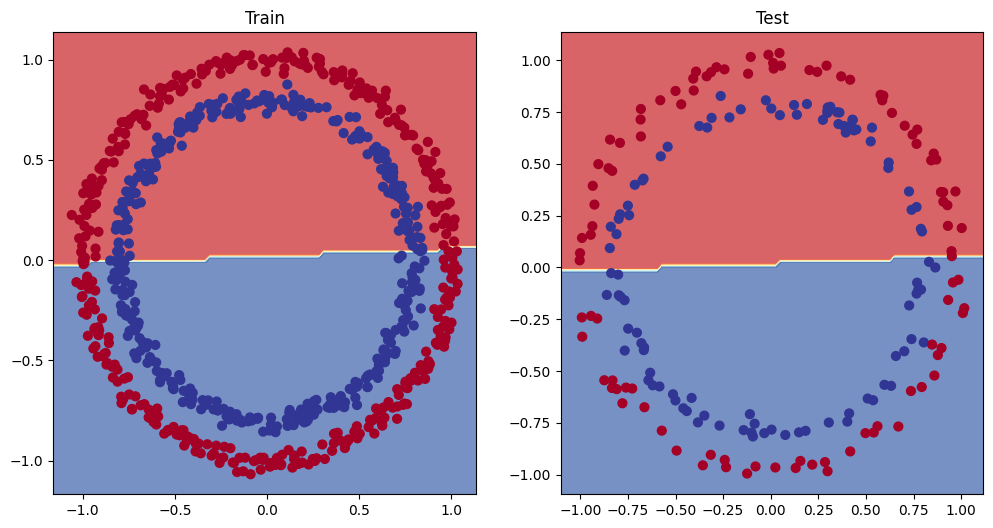

In [33]:
import matplotlib.pyplot as plt
from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Oh wow, it seems like we've found the cause of model's performance issue.

It's currently trying to split the red and blue dots using a straight line...

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is **underfitting**, meaning it's not learning predictive patterns from the data.

How could we improve this?

## 5. Improving a model (from a model perspective) 

These options are all from a model's perspective because they deal directly with the mdoel, rather than the data.

And because these options are all values we (as machine learning enginners and data scientists) can change, they are refered to as **hyperparameters**.

Let's try to fix our model's underfitting problem.

Focusing specifically on the model (not the data), there are a few ways we could do this.

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data. More layers are often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model. More hidden units are often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| **Use transfer learning** | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in [notebook 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/). |

> **Note:** *because you can adjust all of these by hand, they're referred to as **hyperparameters**. 
>
> And this is also where machine learning's half art half science comes in, there's no real way to know here what the best combination of values is for your project, best to follow the data scientist's motto of "experiment, experiment, experiment".

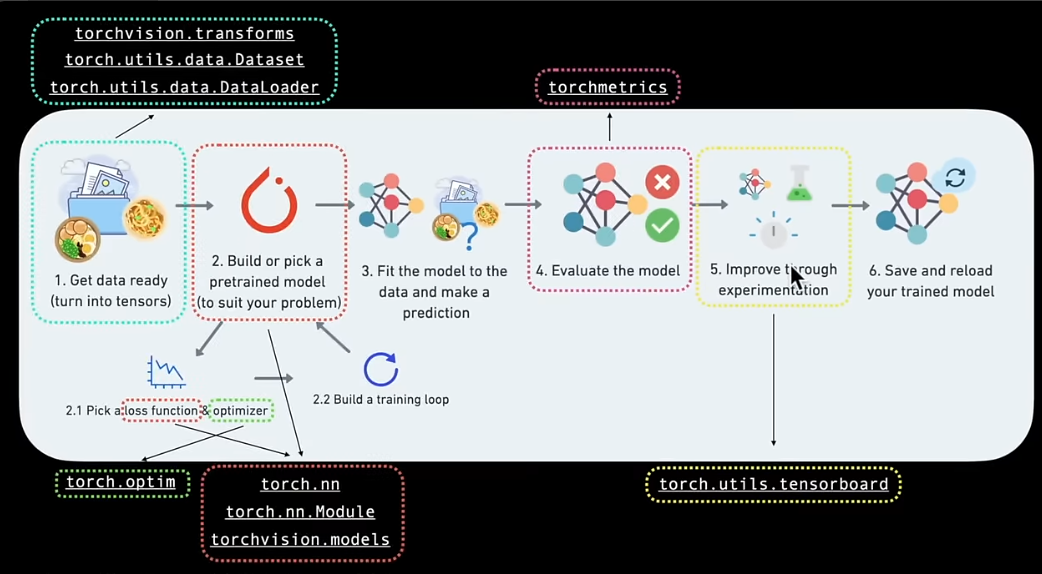

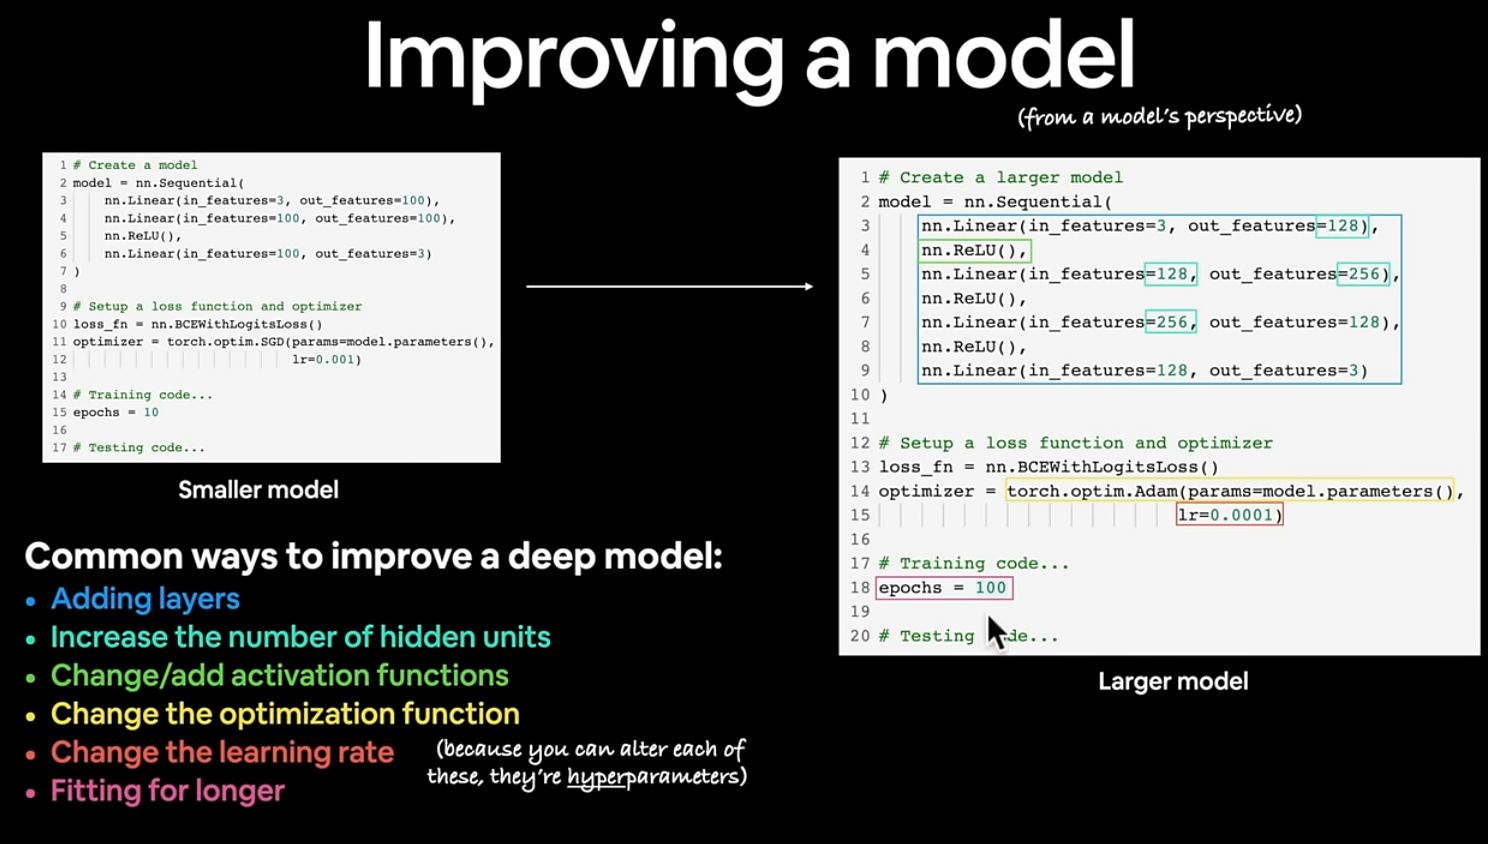


Let's try and improve our model by:
- Adding more hidden units: 5 -> 10
- Adding more layers: 2 -> 3
- Increase the no of epochs: 100 -> 1000

We'll follow the same steps we did above but with a few changed hyperparameters.

Generally when yo uare doing actual machine learning you want to do one thing at a time and track the results.

In [34]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x): # note: always make sure forward is spelt correctly!
         # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x))) # this is the same as above. Its computing the insides of the brackets first then the outside.
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)


Now we've got a model, we'll recreate a loss function and optimizer instance, using the same settings as before.

In [35]:
# creating a loss function
loss_fn = nn.BCEWithLogitsLoss() # Binary Cross Entropy with logits = sigmoid built-in
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


Beautiful, model, optimizer and loss function ready, let's make a training loop.

This time we'll train for longer (epochs=1000 vs epochs=100) and see if it improves our mode

In [36]:
# Creating a training and evaluation loop for the model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Set the number of epochs
epochs = 1000
# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_preds = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
    
    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train) # Using nn.BCEWithLogitsLoss works with raw logits
    acc = accuracy_fn(y_true=y_train, y_preds=y_preds)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_preds=test_preds)
        
    # Print out what's happening every `1000 epochs`
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test accuracy: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test accuracy: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test accuracy: 46.00%


Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test accuracy: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test accuracy: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test accuracy: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test accuracy: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test accuracy: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test accuracy: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test accuracy: 46.00%



What? Our model trained for longer and with an extra layer but it still looks like it didn't learn any patterns better than random guessing.

Let's visualize.

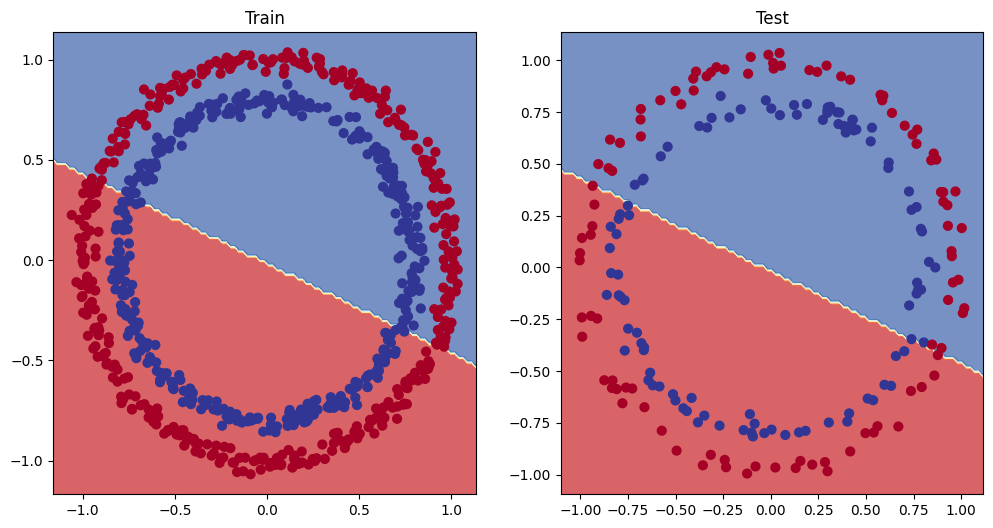

In [37]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Hmmm.

Our model is still drawing a straight line between the red and blue dots.

If our model is drawing a straight line, could it model linear data? Like we did in notebook 01?

## 5.1 Preparing data to see if our model can model a straight line
Let's create some linear data to see if our model's able to model it and we're not just using a model that can't learn anything.

In [38]:
# create some data(same as notebook 1)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula ( without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))


Wonderful, now let's split our data into training and test sets.

In [39]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


## Explanation of the Code: Creating Data for Regression and Splitting into Train/Test Sets

---

### **1. Creating Data for Regression**
```python
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]



#### **What is Happening?**
1. **Defining Parameters**:
   - `weight = 0.7` and `bias = 0.3`: These are the parameters of the linear regression equation \( y = w \cdot x + b \), where \( w \) is the weight (slope) and \( b \) is the bias (intercept).
   - `start = 0`, `end = 1`, `step = 0.01`: These define the range and step size for generating the input data \( X \).

2. **Creating Input Data (`X_regression`)**:
   - `torch.arange(start, end, step)`: Generates a 1D tensor of evenly spaced values starting from `start` (0) to `end` (1), with a step size of `step` (0.01).
   - `.unsqueeze(dim=1)`: Adds an extra dimension to make `X_regression` a 2D tensor of shape `(n_samples, 1)`, which is required for PyTorch models.

3. **Creating Target Data (`y_regression`)**:
   - `y_regression = weight * X_regression + bias`: Applies the linear regression formula \( y = w \cdot x + b \) to compute the target values for each input \( x \).

4. **Checking the Data**:
   - `print(len(X_regression))`: Prints the total number of samples in `X_regression`.
   - `X_regression[:5], y_regression[:5]`: Displays the first 5 samples of `X_regression` and their corresponding target values in `y_regression`.

---

### **2. Splitting Data into Train and Test Sets**


```python
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))



#### **What is Happening?**
1. **Defining the Train/Test Split**:
   - `train_split = int(0.8 * len(X_regression))`: Calculates the index for splitting the data into 80% training and 20% testing. For example, if `len(X_regression) = 100`, `train_split = 80`.

2. **Splitting the Data**:
   - `X_train_regression, y_train_regression`: The first 80% of `X_regression` and `y_regression` are assigned to the training set.
   - `X_test_regression, y_test_regression`: The remaining 20% of `X_regression` and `y_regression` are assigned to the testing set.

3. **Checking the Split**:
   - `print(len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression))`: Prints the number of samples in the training and testing sets to verify the split.

---

### **Summary**
- This code generates synthetic data for a simple linear regression problem using the formula \( y = w \cdot x + b \).
- The data is split into training (80%) and testing (20%) sets to prepare for model training and evaluation.
- The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.



Beautiful, let's see how the data looks.

To do so, we'll use the `plot_predictions()` function we created in notebook 01.

It's contained within the `helper_functions.py` script on the Learn PyTorch for Deep Learning repo which we downloaded above.

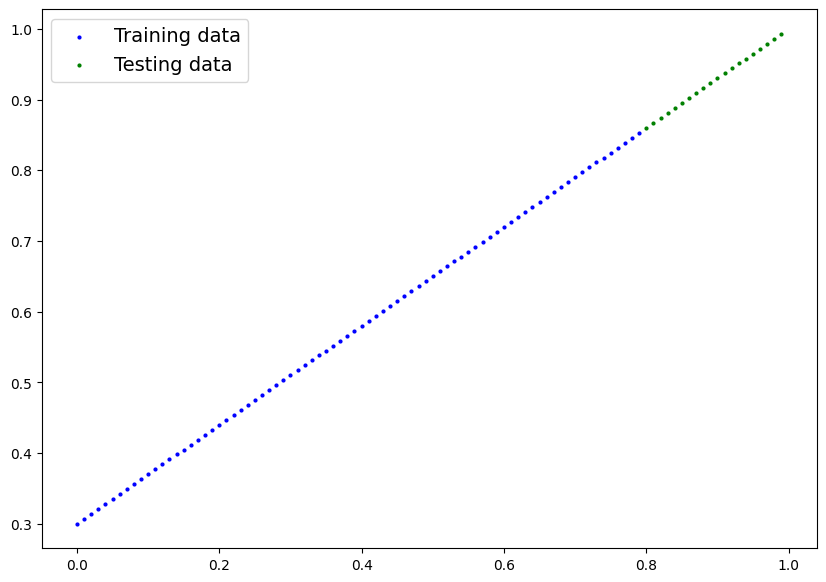

In [42]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                test_data=X_test_regression,
                 test_labels=y_test_regression);


### 5.2 Adjusting model_1 to fit a straight line
Now we've got some data, let's recreate `model_1` but with a loss function suited to our regression data.

In [45]:
# same architecture as model_1 but using nn.Sequential
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)


We'll setup the loss function to be `nn.L1Loss()` (the same as mean absolute error) and the optimizer to be `torch.optim.SGD()`.